In [1]:
!pip install pandas Matplotlib Seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\talre\Downloads\datasets\train.csv')
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df['PasserngerId'] = df['PassengerId'].astype(str)
df['Pclass'] = df['Pclass'].astype(str)

In [45]:
df.describe()


,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.131313,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,13.289416,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,26.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,36.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
median_age = df['Age'].median()
print(median_age)

28.0


In [7]:
df['Age'] = df['Age'].fillna(df.groupby(['Sex','Pclass'])['Age'].transform('median'))

print(df['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [8]:
df['Age'] = df['Age'].round(0)
df
#Age cannot be in decimals. Hence, I rounded the ages to 0 decimal places.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
print(df['Age'].max())
print(df['Age'].min())

80.0
0.0


In [11]:
df = df.drop(columns=['Cabin'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [35]:
#Dealing with the 2 missing values in 'Embarked'
df.fillna({'Embarked': 'Unknown'}, inplace=True)
df.isnull().sum()
#All null values have been removed.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
dtype: int64

In [13]:
df.drop_duplicates(inplace=True)
df.info()
#No duplicates were found/deleted.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [19]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
print(df[["SibSp", "Parch", "FamilySize"]].head())
#created a new column for family size
#family size = spouse/siblings + children + 1 (the person itself)

   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


In [36]:
print(df["Sex"].unique())
print(df["Pclass"].unique())
print(df["Embarked"].unique())

['male' 'female']
[3 1 2]
['S' 'C' 'Q' 'Unknown']


In [23]:
print(df['Age'].mean().round(0))
print(df['Fare'].mean())
print(df['FamilySize'].mean().round(0))

29.0
32.204207968574636
2.0


In [28]:
count_female = (df["Sex"] == "female").sum()
print(count_female)


314


In [30]:
count_1class = (df["Pclass"] == 1).sum()
count_2class = (df["Pclass"] == 2).sum()
count_3class = (df["Pclass"] == 3).sum()
print(count_1class, count_2class, count_3class)

216 184 491


In [39]:
count_S = (df["Embarked"] == "S").sum()
count_Q = (df["Embarked"] == "Q").sum()
count_C = (df["Embarked"] == "C").sum()
print("S:", count_S)
print("Q:", count_Q)
print("C:", count_C)
#we know two members embarked from other port.


S: 644
Q: 77
C: 168


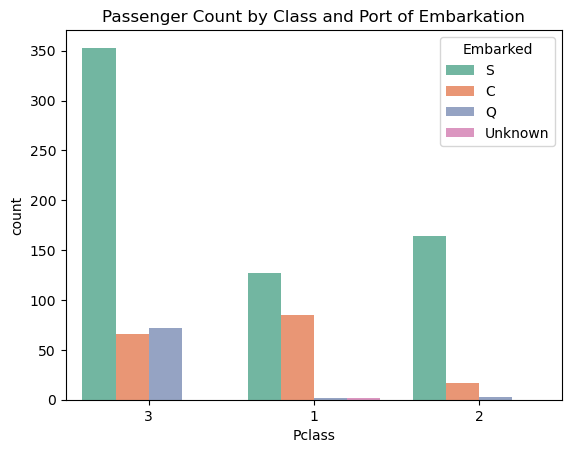

In [51]:
#bar chart for embarked by class
sns.countplot(x="Pclass", hue="Embarked", data=df, palette="Set2")
plt.title("Passenger Count by Class and Port of Embarkation")
plt.show()


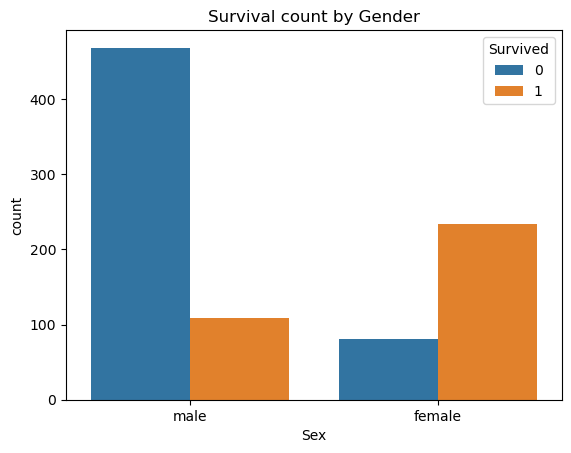

In [46]:
#bar chart for survival by gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival count by Gender')
plt.show()


In [47]:
total_women = (df["Sex"] == "female").sum()
# Women who survived
women_survived = ((df["Sex"] == "female") & (df["Survived"] == 1)).sum()
# Percentage
percent_women_survived = (women_survived / total_women) * 100
print(percent_women_survived)

74.20382165605095


In [48]:
total_men = (df["Sex"] == "male").sum()
# Men who survived
men_survived = ((df["Sex"] == "male") & (df["Survived"] == 1)).sum()
# Percentage
percent_men_survived = (men_survived / total_men) * 100
print(percent_men_survived)

18.890814558058924


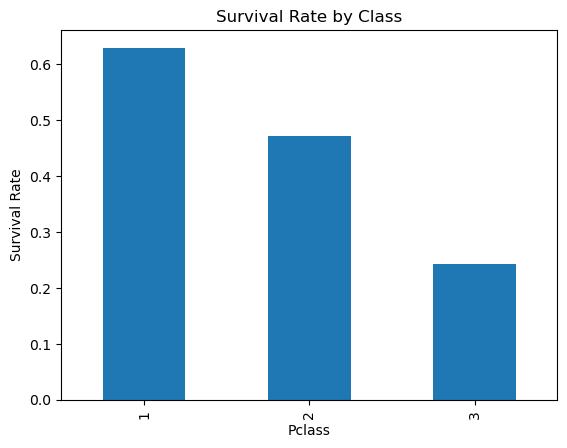

In [50]:
# % of survival by class
survival_rate = df.groupby("Pclass")["Survived"].mean()
survival_rate.plot(kind="bar")
plt.title("Survival Rate by Class")
plt.ylabel("Survival Rate")
plt.show()

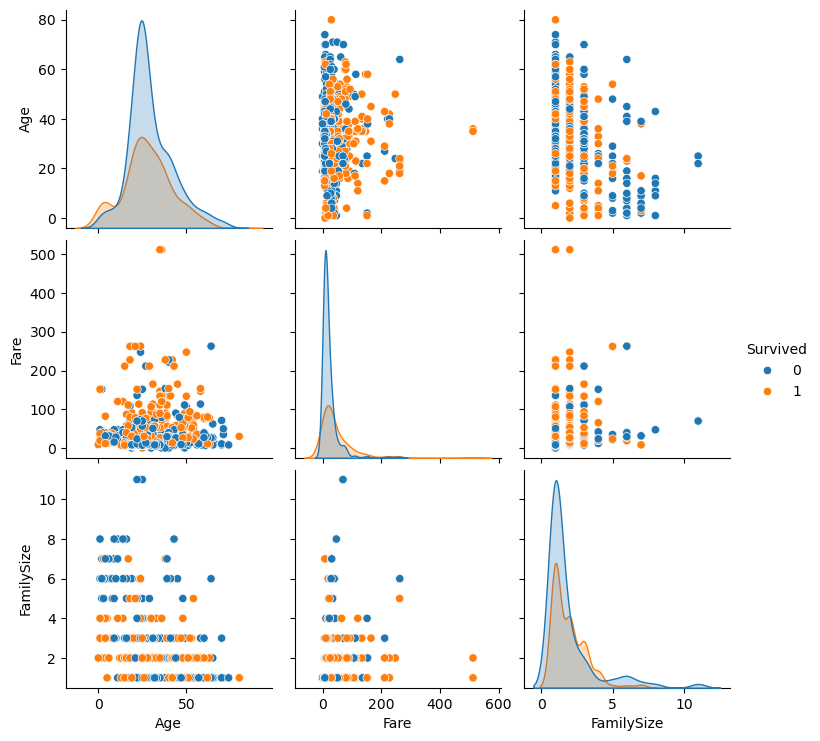

In [49]:
# pairplot of numeric columns by survival
sns.pairplot(df, vars=["Age", "Fare", "FamilySize"], hue="Survived")
plt.show()

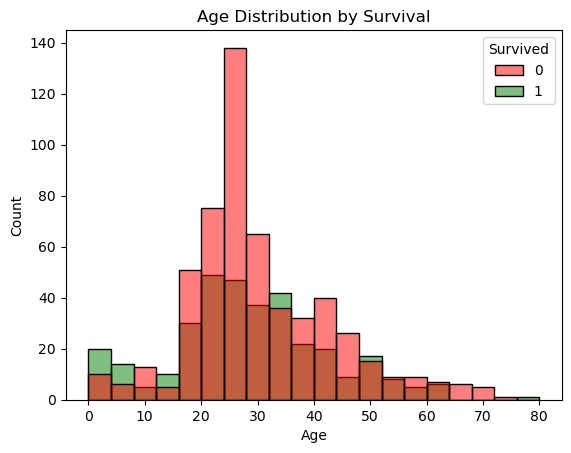

In [57]:
sns.histplot(data=df, x="Age", hue="Survived", bins=20, palette=["red", "green"])
plt.title("Age Distribution by Survival")
plt.show()

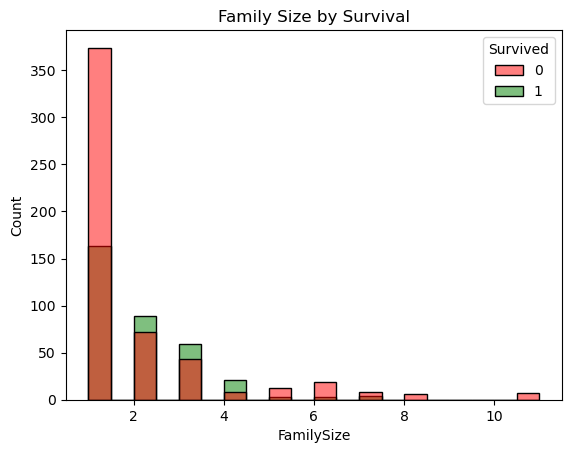

In [59]:
sns.histplot(data=df, x="FamilySize", hue="Survived", bins=20, palette=["red", "green"])
plt.title("Family Size by Survival")
plt.show()
